# Caesarean Section Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d amir75/caesarean-section-classification

Dataset URL: https://www.kaggle.com/datasets/amir75/caesarean-section-classification
License(s): unknown
  0%|                                                 | 0.00/682 [00:00<?, ?B/s]
100%|██████████████████████████████████████████| 682/682 [00:00<00:00, 2.62MB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Caesarean Section Classification/caesarean-section-classification.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Caesarean Section Classification')
zip_ref.close()

## Exploratory Data Analysis

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv("Caesarian Section Classification Dataset(CSV).csv")

In [18]:
df.head()

,Age,Delivey No,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,1,Timely,High,apt,No
1,26,2,Timely,Normal,apt,Yes
2,26,2,Premature,Normal,apt,No
3,28,1,Timely,High,apt,No
4,22,2,Timely,Normal,apt,Yes


In [6]:
df.shape

(80, 6)

In [7]:
df.size

480

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                80 non-null     int64 
 1   Delivey No         80 non-null     int64 
 2   Delivery No        80 non-null     object
 3   Blood of Pressure  80 non-null     object
 4   Heart Problem      80 non-null     object
 5   Caesarian          80 non-null     object
dtypes: int64(2), object(4)
memory usage: 3.9+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,27.6875,5.017927,17.0,25.0,27.0,32.0,40.0
Delivey No,80.0,1.6625,0.794662,1.0,1.0,1.0,2.0,4.0


In [10]:
df.isnull().sum()

Age                  0
Delivey No           0
Delivery No          0
Blood of Pressure    0
Heart Problem        0
Caesarian            0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(4)

In [12]:
df.nunique()

Age                  22
Delivey No            4
Delivery No           3
Blood of Pressure     4
Heart Problem         2
Caesarian             3
dtype: int64

In [13]:
df['Caesarian'].value_counts()

Caesarian
Yes    42
No     34
yes     4
Name: count, dtype: int64

## Data Visualization

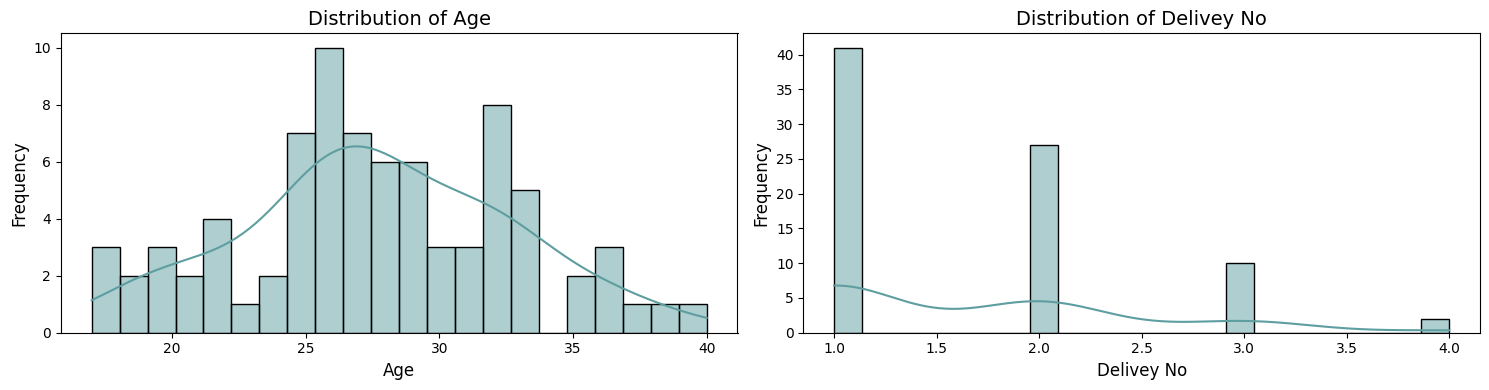

In [14]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure we don't exceed the number of axes
        sns.histplot(df[col], bins=22, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel("Frequency", fontsize=12)
        axes[i].set_title(f"Distribution of {col}", fontsize=14)

# Remove any unused axes
if len(axes) > len(numerical_cols):
    for j in range(len(numerical_cols), len(axes)):
        axes[j].remove()

plt.tight_layout()
plt.show()

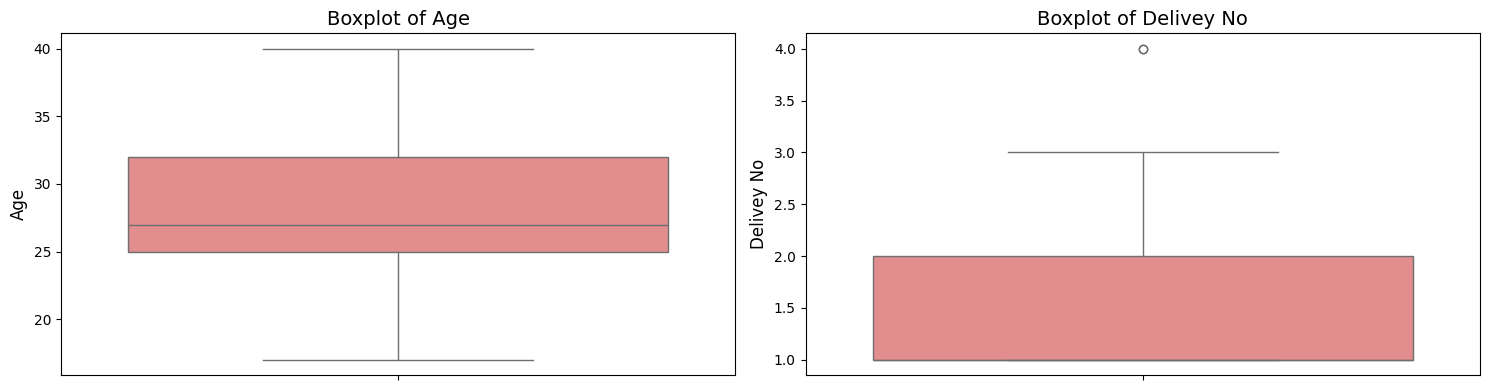

In [15]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

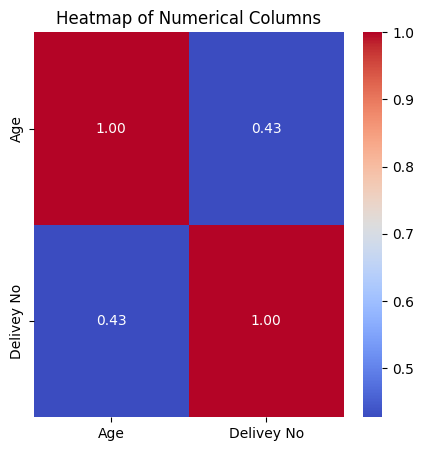

In [17]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(5, 5))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [25]:
# Renamming all the yes values of caesariran to Yes

df['Caesarian'] = df['Caesarian'].replace({'yes': 'Yes', 'no': 'No'})

In [27]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [28]:
X = df.drop(columns=['Caesarian'])
y = df['Caesarian']

In [29]:
# SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [30]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Evaluation

In [31]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [33]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.8421052631578947, 0.8421052631578947, 0.8947368421052632, 0.7894736842105263, 0.8421052631578947, 0.7368421052631579, 0.7894736842105263, 0.7368421052631579, 0.5789473684210527]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.77      1.00      0.87        10

    accuracy                           0.84        19
   macro avg       0.88      0.83      0.83        19
weighted avg       0.88      0.84      0.84        19

Confusion Matrix:
 [[ 6  3]
 [ 0 10]]


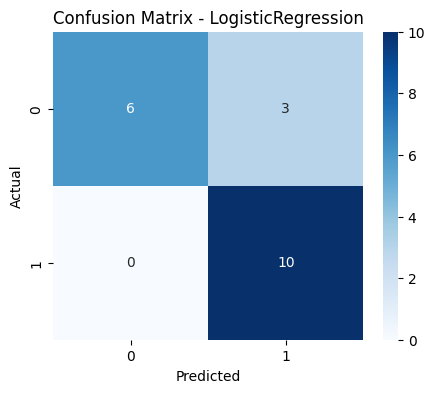

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.77      1.00      0.87        10

    accuracy                           0.84        19
   macro avg       0.88      0.83      0.83        19
weighted avg       0.88      0.84      0.84        19

Confusion Matrix:
 [[ 6  3]
 [ 0 10]]


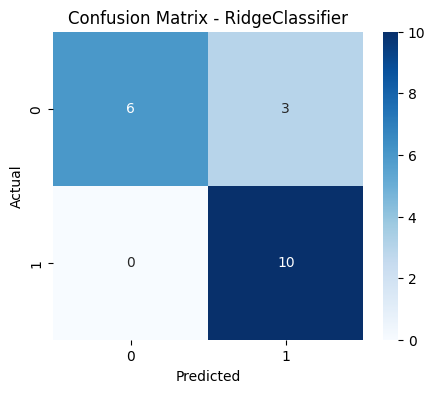

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.83      1.00      0.91        10

    accuracy                           0.89        19
   macro avg       0.92      0.89      0.89        19
weighted avg       0.91      0.89      0.89        19

Confusion Matrix:
 [[ 7  2]
 [ 0 10]]


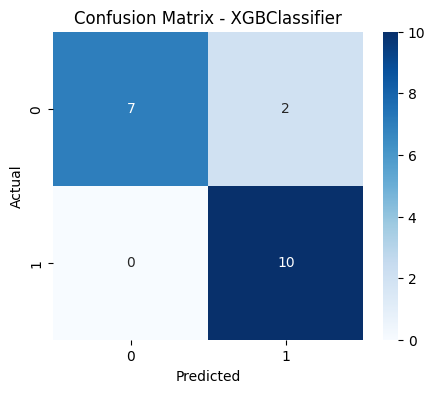

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.69      0.90      0.78        10

    accuracy                           0.74        19
   macro avg       0.76      0.73      0.72        19
weighted avg       0.76      0.74      0.73        19

Confusion Matrix:
 [[5 4]
 [1 9]]


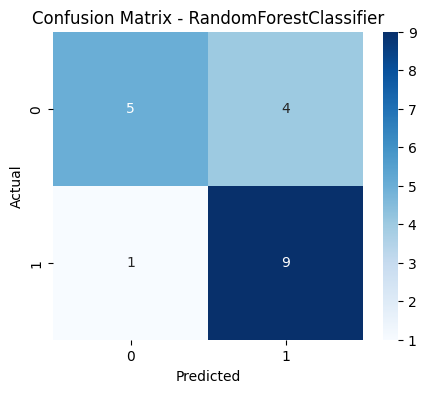

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.77      1.00      0.87        10

    accuracy                           0.84        19
   macro avg       0.88      0.83      0.83        19
weighted avg       0.88      0.84      0.84        19

Confusion Matrix:
 [[ 6  3]
 [ 0 10]]


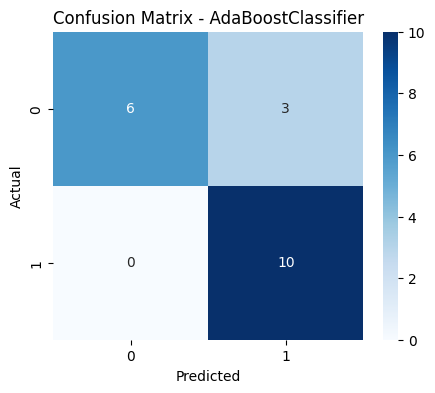

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.67      1.00      0.80        10

    accuracy                           0.74        19
   macro avg       0.83      0.72      0.71        19
weighted avg       0.82      0.74      0.71        19

Confusion Matrix:
 [[ 4  5]
 [ 0 10]]


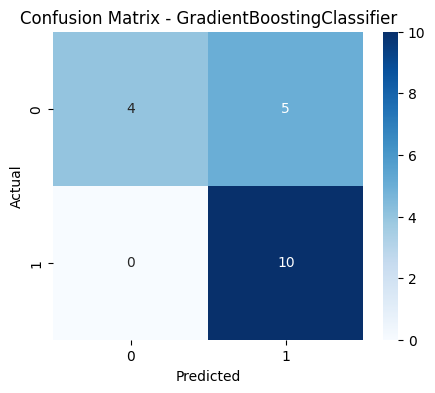

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.62      0.80      0.70        10

    accuracy                           0.63        19
   macro avg       0.64      0.62      0.61        19
weighted avg       0.64      0.63      0.62        19

Confusion Matrix:
 [[4 5]
 [2 8]]


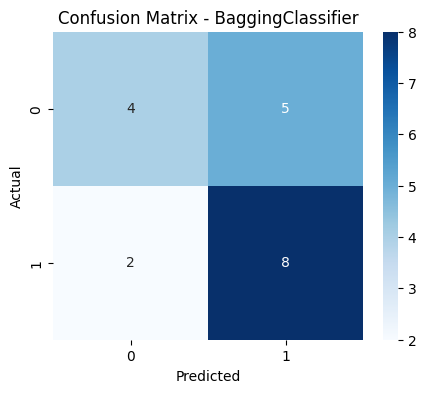

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.69      0.90      0.78        10

    accuracy                           0.74        19
   macro avg       0.76      0.73      0.72        19
weighted avg       0.76      0.74      0.73        19

Confusion Matrix:
 [[5 4]
 [1 9]]


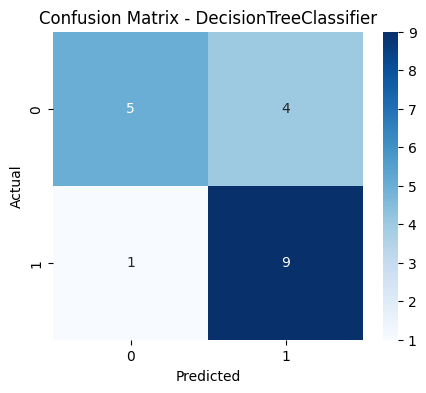

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.78      0.64         9
           1       0.67      0.40      0.50        10

    accuracy                           0.58        19
   macro avg       0.60      0.59      0.57        19
weighted avg       0.61      0.58      0.56        19

Confusion Matrix:
 [[7 2]
 [6 4]]


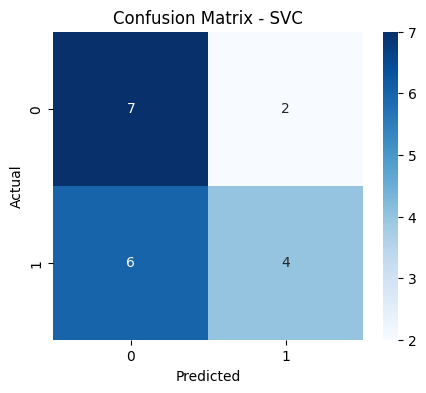

In [34]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()